# PLot the Eastward Water Velocity over Northward water velocity 
### The following code I use the FVCOME data and make an animation for the velocity

### Import libraries

In [1]:
########import libraries#########
import numpy as np
import pandas as pd
import os
import xarray as xr
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
#cartopy.config['data_dir'] = os.getenv('CARTOPY_DIR', cartopy.config.get('data_dir'))
from pylag.processing.plot import create_figure, colourmap
import cmocean
from matplotlib import pyplot as plt
#%config InlineBackend.figure_format = 'retina'
plt.ion()  # To trigger the interactive inline mode
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning) 
import matplotlib.animation as animation
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import HTML
import datetime

## Reading the data

In [2]:
#read data
drop_variables=['siglay','siglev']
#data = '/home/samin/data/112600_0001.nc'
# read all the nc files in a directory
data = '/home/samin/data/FVCOME_OUTPUT/Gldata/FVCOMEDATA/202308/'
ds = xr.open_mfdataset(data+'*.nc', decode_times=False,drop_variables=drop_variables)

#data = '/home/samin/data/FVCOME_OUTPUT/Gldata/FVCOMEDATA/202306/Fvcome_houron_estuary_20230601.t00z.nc'
#ds = xr.open_dataset(data, decode_times=False,drop_variables=drop_variables)


## Read the required variables

In [3]:
#read variables
lat = ds.variables['lonc']
lon=ds.variables['latc']
u = ds.variables['u']
v = ds.variables['v']
time = ds.variables['Times']

In [4]:
#print(time.values)
# print the lenght of the time
#print(len(time))
# print the format of time 
# print the mean of u and v
u_mean = u.mean().values
v_mean = v.mean().values


In [5]:
ds['time'] = pd.to_timedelta(ds['time'], unit='D') + pd.Timestamp('2023-05-31')
year_month = ds['time'].dt.strftime('%Y-%m').values
print(year_month)


['2028-12' '2028-12' '2028-12' '2028-12' '2028-12' '2028-12' '2028-12'
 '2028-12' '2028-12' '2028-12' '2028-12' '2028-12' '2028-12' '2028-12'
 '2028-12' '2028-12' '2028-12' '2029-01' '2029-01' '2029-01' '2029-01'
 '2029-01' '2029-01' '2029-01' '2029-01' '2029-01' '2029-01' '2029-01'
 '2029-01' '2029-01' '2029-01' '2029-01' '2029-01' '2029-01' '2029-01'
 '2029-01' '2029-01' '2029-01' '2029-01' '2029-01' '2029-01' '2029-01'
 '2029-01' '2029-01' '2029-01' '2029-01' '2029-01' '2029-01' '2029-01'
 '2029-01' '2029-01' '2029-01' '2029-01' '2029-01' '2029-01' '2029-01'
 '2029-01' '2029-01' '2029-01' '2029-01' '2029-01' '2029-01' '2029-01'
 '2029-01' '2029-01' '2029-01' '2029-01' '2029-01' '2029-01' '2029-01'
 '2029-01' '2029-01' '2029-01' '2029-01' '2029-01' '2029-01' '2029-01'
 '2029-01' '2029-01' '2029-01' '2029-01' '2029-01' '2029-01' '2029-01'
 '2029-01' '2029-01' '2029-01' '2029-01' '2029-01' '2029-01' '2029-01'
 '2029-01' '2029-01' '2029-01' '2029-01' '2029-01' '2029-01' '2029-01'
 '2029

In [8]:
### read times and save in a list
for i in range(0,117):
    dsplot=ds.isel(siglay=0, time=i)
    #print(dsplot.v.values)
    #print(dsplot.u.values)
    

In [9]:
dsplot = ds.isel(siglay=0).isel(time=20)
dsplot.time.values
#dsplot.v[1].values

numpy.datetime64('2029-01-01T18:00:00.000000000')

In [6]:
u_mean = dsplot.u.mean(dim='nele')
print(u_mean.values)

NameError: name 'dsplot' is not defined

# Plotting the data

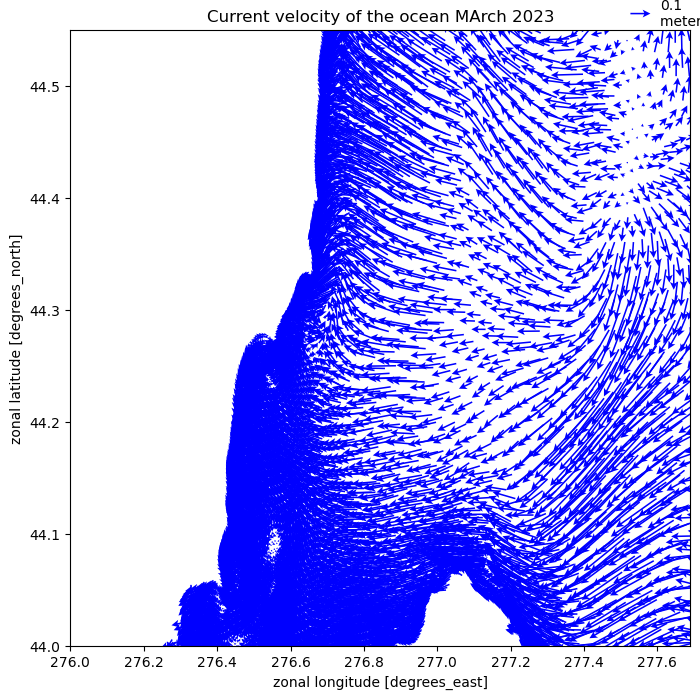

In [12]:

fig, ax = plt.subplots(figsize=(8,8))
quiver = dsplot.plot.quiver(x="lonc", y="latc", ax = ax, u='u', v='v',robust=True, 
                           width= 0.0025,headaxislength=4,headwidth=5, minshaft=1,color='blue',
                           scale_units='inches', scale=0.5) 
ax.set(xlim=(276,277.69), ylim=(44,44.55))
# add title to the plot base on the time
ax.set_title('Current velocity of the ocean August 2023')
# add the mean of the current velocity to the title
#ax.set_title('the current velocity of the ocean MArch 2023\n u_mean = {:.2f}, v_mean = {:.2f}'.format(u_mean.mean().values, dsplot.v.mean().values))

# save the figure in the following directory /home/samin/data/FVCOME_OUTPUT/Gldata/FVCOMEDATA with the name Currentvelocity202306.png
plt.savefig('/home/samin/data/FVCOME_OUTPUT/simulations/horon/results/Currentvelocity202308.png')
plt.show()

## Plotting the Animation

In [14]:
fig, ax = plt.subplots(figsize=(8,8))

def update_quiver(num):
    
    dsplot = ds.isel(siglay=0).isel(time=num)
    quiver = dsplot.plot.quiver(x="lonc", y="latc", ax = ax, u='u', v='v', 
                           width= 0.0005,minlength=5,headaxislength=4,headwidth=4, minshaft=1,color='blue',
                           scale_units= 'inches', scale=0.5)
    ax.set(xlim=(276,277.69), ylim=(44,44.55))
    ax.set_title(f'Time: {ds["time"].values[num]}')
    return(quiver,)

plt.close(fig)

anim = animation.FuncAnimation(fig,update_quiver,frames=10,
                           interval= 500, blit=False)
    #update_quiver(i)
    #ax.set_xlim(276,278)
    #ax.set_ylim(45.5,46)
    #fig.tight_layout()
plt.show()                         
HTML(anim.to_html5_video())
# save the animimation in the following directory /home/samin/data/FVCOME_OUTPUT/Gldata/FVCOMEDATA with the name Currentvelocity202306.gif
anim.save('/home/samin/data/FVCOME_OUTPUT/Gldata/FVCOMEDATA/Currentvelocity202308.gif', writer='imagemagick', fps=10)



MovieWriter imagemagick unavailable; using Pillow instead.
